# Predicting Customer Churn in the Telecom Industry

Customer attrition (a.k.a customer churn) is one of the biggest expenditures of any organization. If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives manifold. 

As perceive myself as a data scientist in the telecommunication industry, to help the organization in dealing with customer attrition by building a machine learning model to **predict the likelihood of a customer leaving the company.** This will in turn help the company minimize the rate at which customers leave and increase their customer retention rate. This analysis is done based on historical data of customers. 

I will be using supervised machine learning algorithms to build thsi model. This dataset was extracted from IBM
**IBM Cognos Analytics 11.1.3+ base samples dataset**

**Context**

A fictional telco company that provided home phone and Internet services to 7043 customers in California. 

**Data Description**

Data Description
7043 observations with 33 variables

CustomerID: A unique ID that identifies each customer.

Gender: The customer’s gender: Male, Female

Senior Citizen: Indicates if the customer is 65 or older: Yes, No

Partner: Indicate if the customer has a partner: Yes, No

Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

Churn: Yes = the customer left the company. No = the customer remained with the company.

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy
from scipy.stats import chisquare
from bioinfokit.analys import stat
%matplotlib inline 

pd.set_option('display.max_colwidth', None) #to display all columns in the dataframe
pd.set_option('display.max_columns', None )

In [2]:
#loading the data
data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data exploration 

In [3]:
#shape of data 
print('The dataset has {} columns and {} rows'.format(data.shape[1], data.shape[0]))

The dataset has 21 columns and 7043 rows


In [4]:
#looking at the information about the data in details 
#data.info()

it seems all the columns are in the correct data format. So there is no need to scrutinize it by changing data type

In [5]:
#converting the total charges object datatype to float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors = 'coerce')


In [6]:
#checking if there are null values in the dataset
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are no null values in the dataset, we are good to go. huurraaaay!!|

In [7]:
#descriptive statistics of the numerical data 
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


From the descriptive stats, it can be observed that, the  monthly charge ranges from 0.00 to 118.75 and the average monthly charge is 64.76. The higest number of months spent in the industry is 72 months and the minimum being 0. 

In [8]:
#dropping missing values in the total charges column
data.dropna(inplace=True)

In [9]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Exploring The Categorical Variables

In [10]:
#deleting the customer ID column since it is not providing any info
data.drop(columns=['customerID'], inplace=True)

In [11]:
categorical=data.select_dtypes(include=['object'])
for cat in categorical:
    print(cat)

gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
Churn


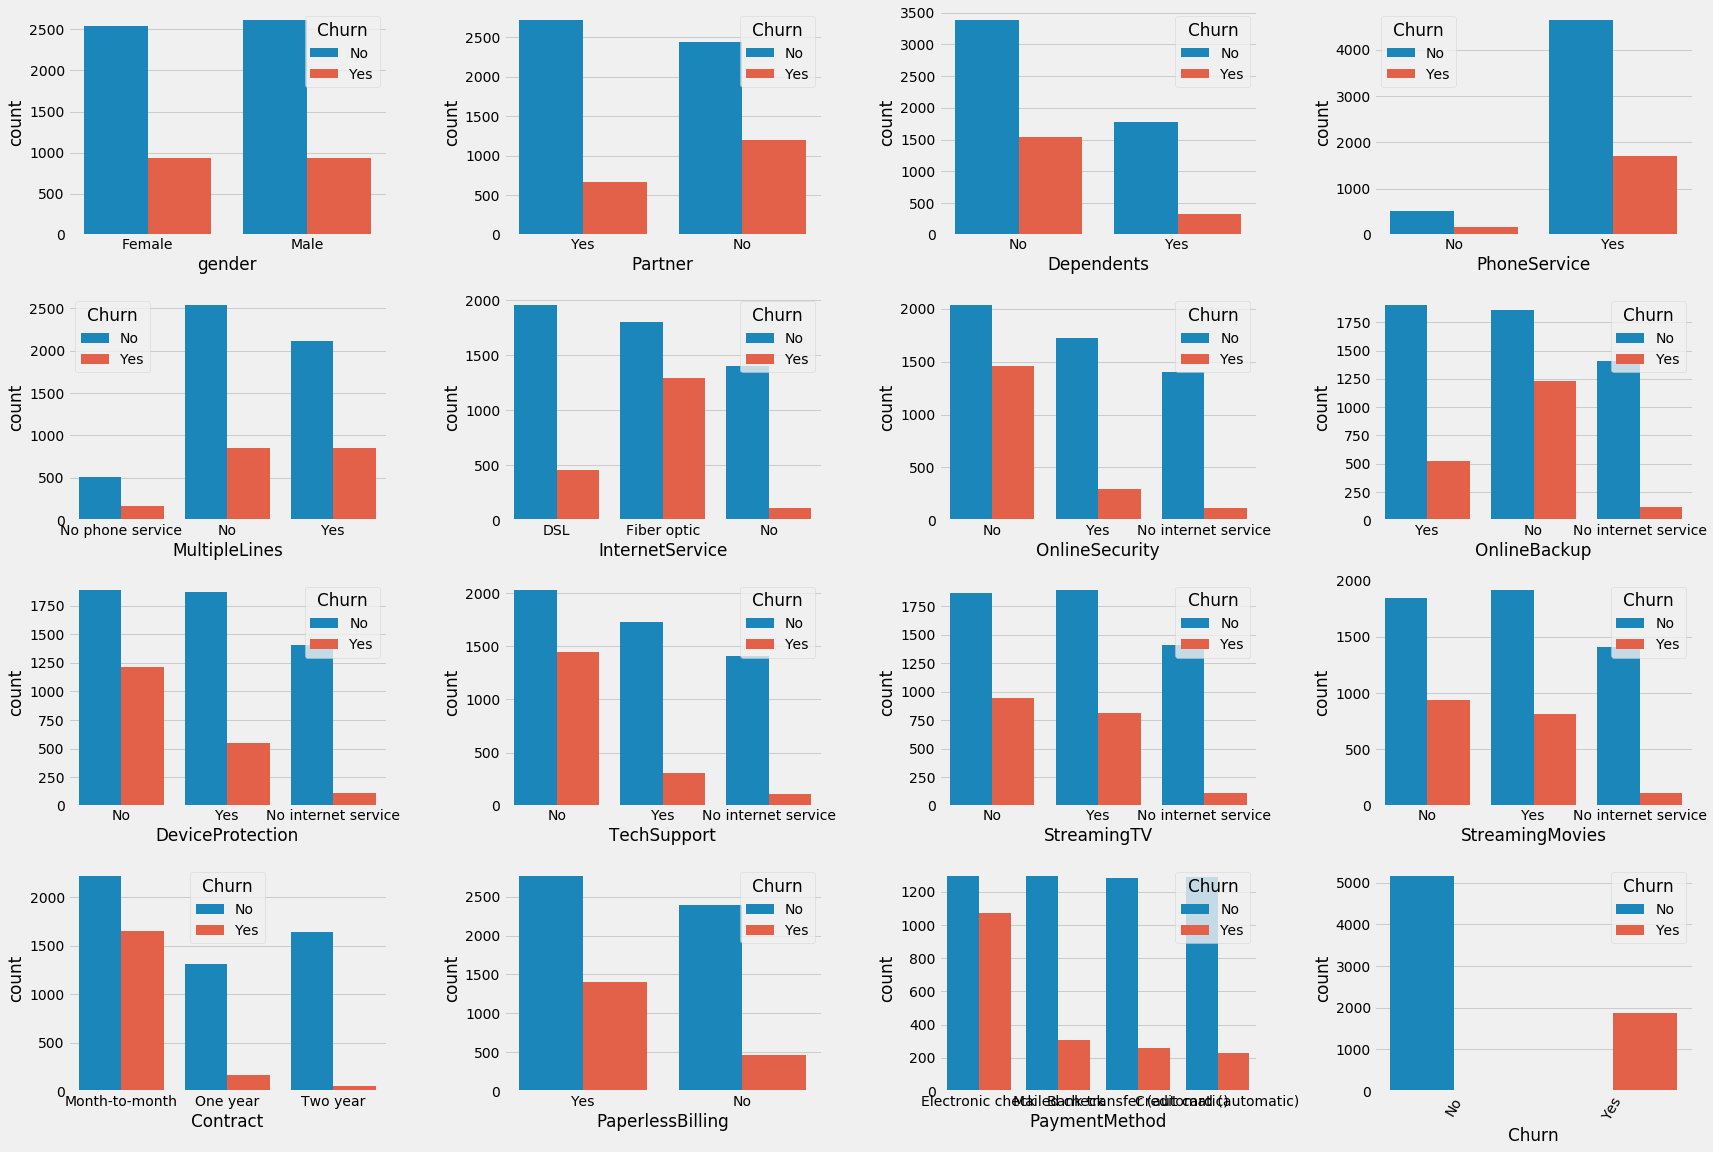

In [12]:
import matplotlib.style as style
style.use('fivethirtyeight')
fig,axes = plt.subplots(4,4, figsize=(24,16))
for index,cat in enumerate(categorical):
    row,col = index//4,index%4
    sns.countplot(x=cat,data=data,hue='Churn',ax=axes[row,col])
    
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.xticks(rotation=60)
plt.show()

### Univariate Analaysis of Categprical Variables

In [13]:
def cat_explore(df, x):
    print('Unique values in {} column'.format(x))
    print(df[x].nunique())
    print('='*30)
    print('Number of records')

    print(df[x].value_counts())
    print('='*30)
    print(sns.countplot(df[x]).set_title('Distribution of {}'.format(x)))

Unique values in gender column
2
Number of records
Male      3549
Female    3483
Name: gender, dtype: int64
Text(0.5, 1.0, 'Distribution of gender')


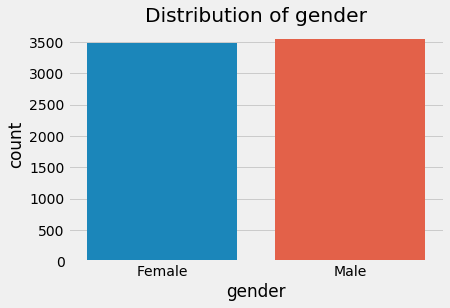

In [14]:
cat_explore(data, 'gender')

Unique values in Partner column
2
Number of records
No     3639
Yes    3393
Name: Partner, dtype: int64
Text(0.5, 1.0, 'Distribution of Partner')


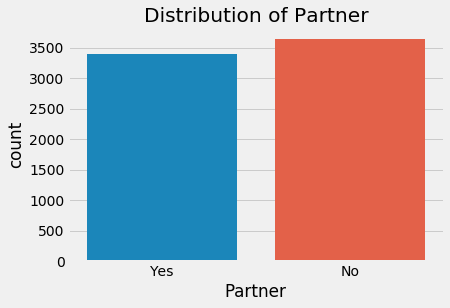

In [15]:
cat_explore(data, 'Partner')

Unique values in Dependents column
2
Number of records
No     4933
Yes    2099
Name: Dependents, dtype: int64
Text(0.5, 1.0, 'Distribution of Dependents')


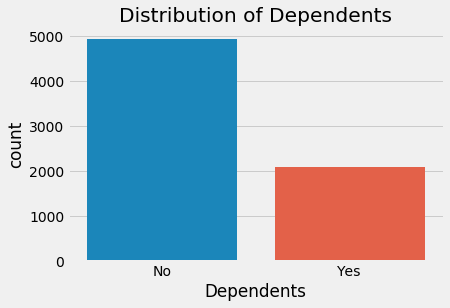

In [16]:
cat_explore(data, 'Dependents')

Unique values in PhoneService column
2
Number of records
Yes    6352
No      680
Name: PhoneService, dtype: int64
Text(0.5, 1.0, 'Distribution of PhoneService')


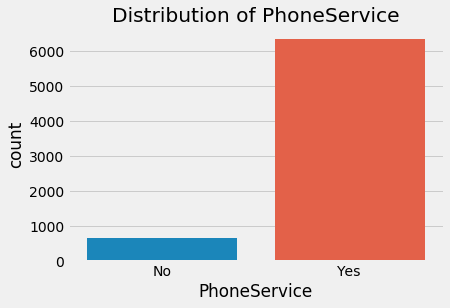

In [17]:
cat_explore(data, 'PhoneService')

Unique values in MultipleLines column
3
Number of records
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
Text(0.5, 1.0, 'Distribution of MultipleLines')


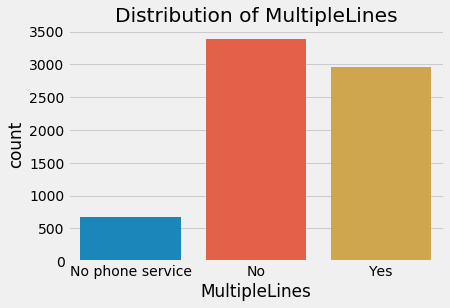

In [18]:
cat_explore(data, 'MultipleLines')

Unique values in OnlineSecurity column
3
Number of records
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
Text(0.5, 1.0, 'Distribution of OnlineSecurity')


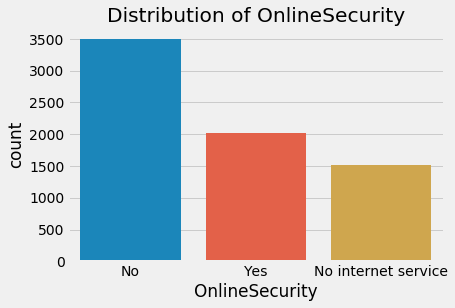

In [19]:
cat_explore(data, 'OnlineSecurity')

Unique values in OnlineBackup column
3
Number of records
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
Text(0.5, 1.0, 'Distribution of OnlineBackup')


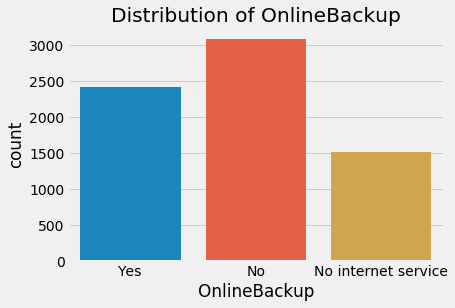

In [20]:
cat_explore(data, 'OnlineBackup')

Unique values in DeviceProtection column
3
Number of records
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
Text(0.5, 1.0, 'Distribution of DeviceProtection')


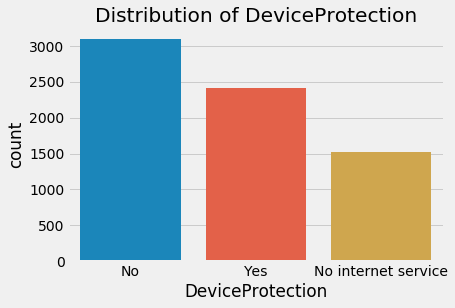

In [21]:
cat_explore(data, 'DeviceProtection')

Unique values in TechSupport column
3
Number of records
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64
Text(0.5, 1.0, 'Distribution of TechSupport')


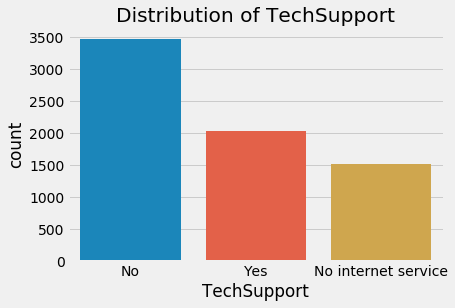

In [22]:
cat_explore(data, 'TechSupport')

Unique values in StreamingTV column
3
Number of records
No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64
Text(0.5, 1.0, 'Distribution of StreamingTV')


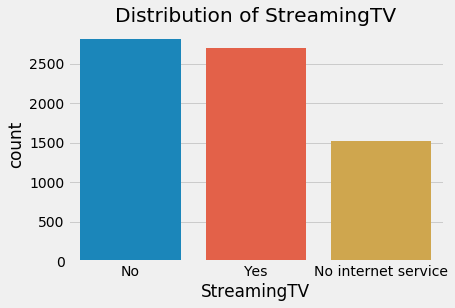

In [23]:
cat_explore(data, 'StreamingTV')

Unique values in StreamingMovies column
3
Number of records
No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64
Text(0.5, 1.0, 'Distribution of StreamingMovies')


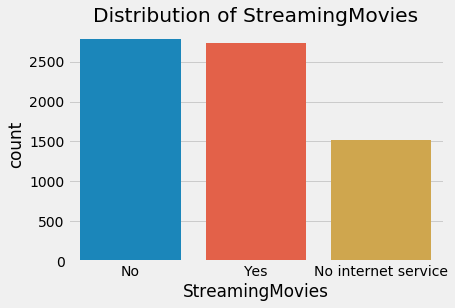

In [24]:
cat_explore(data, 'StreamingMovies')

Unique values in Contract column
3
Number of records
Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64
Text(0.5, 1.0, 'Distribution of Contract')


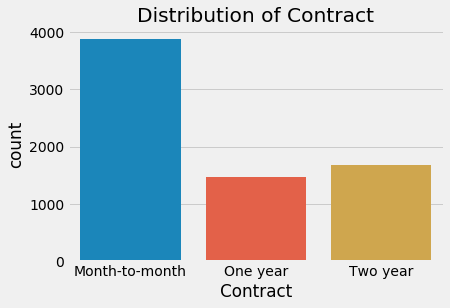

In [25]:
cat_explore(data, 'Contract')

Unique values in PaperlessBilling column
2
Number of records
Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64
Text(0.5, 1.0, 'Distribution of PaperlessBilling')


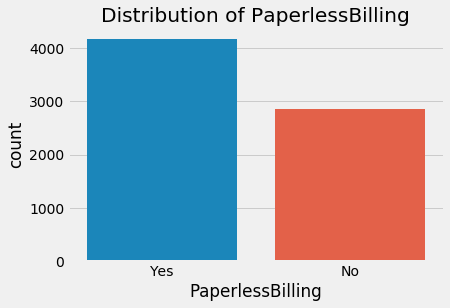

In [26]:
cat_explore(data, 'PaperlessBilling')

Unique values in PaymentMethod column
4
Number of records
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64
Text(0.5, 1.0, 'Distribution of PaymentMethod')


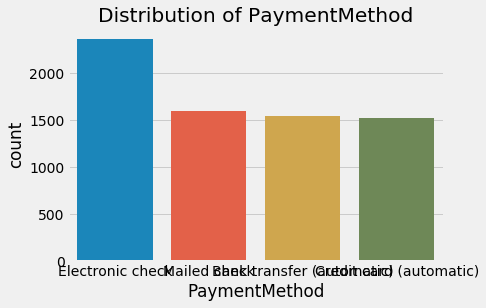

In [27]:
cat_explore(data, 'PaymentMethod')

In [28]:
data.keys()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
# fig,axes = plt.subplots(4,4,figsize=(16,18))
# for index,cat in enumerate(categorical):
#     row,col = index//3,index%3
#     sns.countplot(x=categorical,data=data, ax=axes[row,col]) 
    
# plt.subplots_adjust(hspace=0.5)
# plt.tight_layout()
# plt.show()

In [30]:
#distribution of the categorical variables 
# fig, axes=plt.subplots(4,4,figsize=(8,7))
# for index, cat in enumerate(categorical): #check which columns are categorical
#     row, col = index//3, index%3
#     sns.countplot(x=cat, data=data,  hue='Churn', ax=axes[row, col])
# plt.subplots_adjust(hspace=0.5)
# plt.tight_layout()
# plt.show()

#### Relationship Between Categorical Variables and the Target Variable

** Here we will use statistical concepts like chi square and crosstabulation to find the relationship between variables

In [31]:
#defining a function for categorical variables
def explore_relationship(df, x, y):
    cross_tab=pd.crosstab(df[x], df[y])
    print('======================================================')
    test=stat()
    test.chisq(df=cross_tab)
    print(test.summary)
    print('Null Hypothesis: {} and {} are independent'.format(x,y))
    print('Altenate Hypothesis: {} and {} are not independent'.format(x,y))
    print('======================================================')
    print('Relationship Between {} and {}'.format(x,y))
    print(pd.crosstab(df[x], df[y]))
    pd.crosstab(df[x], df[y]).plot.bar()
    

#### Gender and Churn


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1      0.475455   0.490488
Log-likelihood     1      0.47544    0.490495

Null Hypothesis: gender and Churn are independent
Altenate Hypothesis: gender and Churn are not independent
Relationship Between gender and Churn
Churn     No  Yes
gender           
Female  2544  939
Male    2619  930


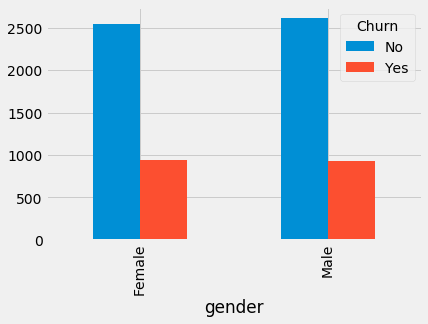

In [32]:
explore_relationship(data,'gender','Churn')

From the output of the chi square, since the p value (0.486579)>0.05, we fail to reject the null hypothesis at 5% significance level and conclude that gender and churn are independent. This means that, a person being male or female does no have a relationshi with leaving the company or not. The output of the crosstabulation and the graph depicts same

#### Partner and Churn 


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       157.503  3.9738e-36
Log-likelihood     1       159.399  1.53129e-36

Null Hypothesis: Partner and Churn are independent
Altenate Hypothesis: Partner and Churn are not independent
Relationship Between Partner and Churn
Churn      No   Yes
Partner            
No       2439  1200
Yes      2724   669


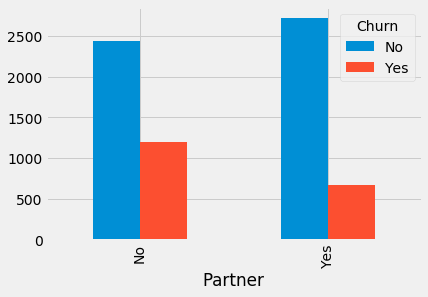

In [33]:
explore_relationship(data,'Partner','Churn')

Here the p value is less than 0.05 and so we reject the null hypothesis at 5% significance level and conclude that, Partner and churn are dependent. Thus, a person having a partner or not have an influence on leaving the telcom or not. 
The output of the cross tabulation and the graph gives us a clearer view of this. customers without partners are likely to leave as compared to their counterparts. 

#### Dependents and Churn


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       186.322  2.01966e-42
Log-likelihood     1       199.793  2.31791e-45

Null Hypothesis: Dependents and Churn are independent
Altenate Hypothesis: Dependents and Churn are not independent
Relationship Between Dependents and Churn
Churn         No   Yes
Dependents            
No          3390  1543
Yes         1773   326


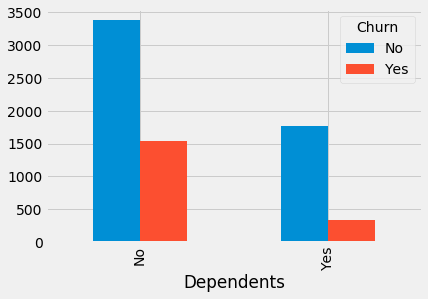

In [34]:
explore_relationship(data,'Dependents','Churn')

Here also, the p value is less than 0.05 and so we reject the null hypothesis at 5% significance level. Thus Partner and churn are dependent. Thus, a person having dependents or not have an influence on leaving the telcom or not. The output of the cross tabulation and the graph gives us a clearer view of this. customers without dependents are likely to leave as compared to their counterparts.

#### PhoneService and Churn


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1      0.873733   0.349924
Log-likelihood     1      0.883463   0.347255

Null Hypothesis: PhoneService and Churn are independent
Altenate Hypothesis: PhoneService and Churn are not independent
Relationship Between PhoneService and Churn
Churn           No   Yes
PhoneService            
No             510   170
Yes           4653  1699


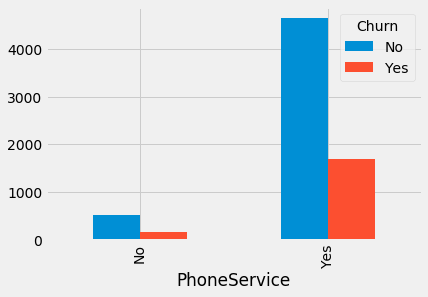

In [35]:
explore_relationship(data,'PhoneService','Churn')

From the output of the chi square, the p value (0.338783)>0.05, we therefore, fail to reject the null hypothesis at 5% significance level and conclude that gender and churn are independent. This means that, phone services has no relationship with churn. This is evident in the output of the crosstabulation and the graph.

#### Multiple Lines and Churn


Chi-squared test for independence

Test              Df    Chi-square     P-value
--------------  ----  ------------  ----------
Pearson            2       11.2715  0.00356793
Log-likelihood     2       11.2281  0.0036463

Null Hypothesis: MultipleLines and Churn are independent
Altenate Hypothesis: MultipleLines and Churn are not independent
Relationship Between MultipleLines and Churn
Churn               No  Yes
MultipleLines              
No                2536  849
No phone service   510  170
Yes               2117  850


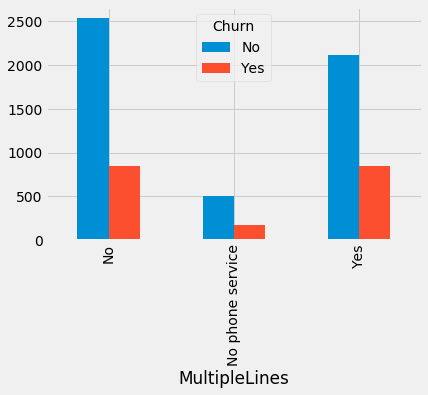

In [36]:
explore_relationship(data,'MultipleLines','Churn')

p value is less than 0.05. We reject the null hypothesis at 5% significance level and coclude that, Multiple Lines and Churn are dependent. A person having multiple lines or not has a relationship with churn. customers with multiple lines are likely to leave as compared to those without.

#### Online Security and Churn


Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       846.677  1.40069e-184
Log-likelihood     2       907.525  8.57846e-198

Null Hypothesis: OnlineSecurity and Churn are independent
Altenate Hypothesis: OnlineSecurity and Churn are not independent
Relationship Between OnlineSecurity and Churn
Churn                  No   Yes
OnlineSecurity                 
No                   2036  1461
No internet service  1407   113
Yes                  1720   295


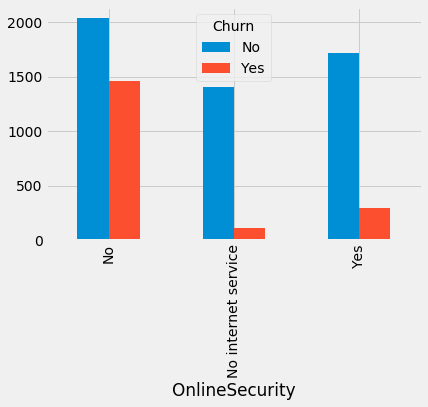

In [37]:
explore_relationship(data,'OnlineSecurity','Churn')

Here too we reject the null hypothesis since the p value is less than 0.05 and go ahead to reject the null hypothesis at 5% significance level. Customers without online security service are at a more likely to leave the company. 

#### Online Backup and Churn


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            2       599.175  7.7761e-131
Log-likelihood     2       656.212  3.2015e-143

Null Hypothesis: OnlineBackup and Churn are independent
Altenate Hypothesis: OnlineBackup and Churn are not independent
Relationship Between OnlineBackup and Churn
Churn                  No   Yes
OnlineBackup                   
No                   1854  1233
No internet service  1407   113
Yes                  1902   523


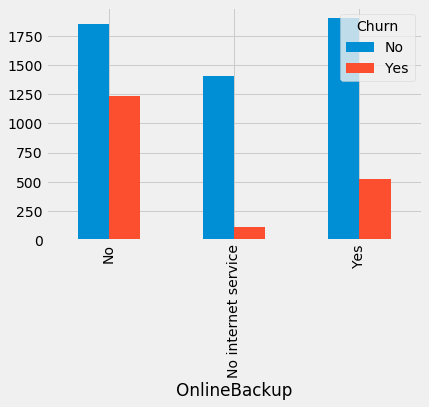

In [38]:
explore_relationship(data,'OnlineBackup','Churn')

We reject the null hyothesis at 5% level of significance and conclude that, online backup is related to churn. Customers without backup are at a likelihood of leaving the company. 


Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       555.88   1.95939e-121
Log-likelihood     2       615.782  1.92572e-134

Null Hypothesis: DeviceProtection and Churn are independent
Altenate Hypothesis: DeviceProtection and Churn are not independent
Relationship Between DeviceProtection and Churn
Churn                  No   Yes
DeviceProtection               
No                   1883  1211
No internet service  1407   113
Yes                  1873   545


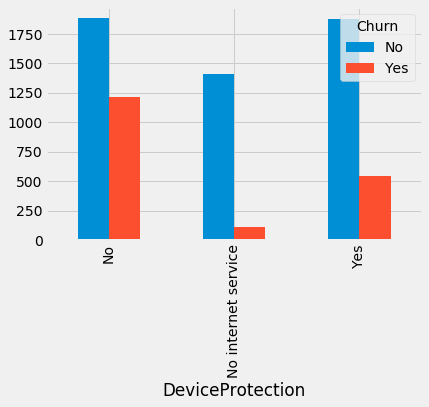

In [39]:
explore_relationship(data,'DeviceProtection','Churn')

We reject the null hyothesis at 5% level of significance and conclude that, online device protection is related to churn. Customers without backup are at a likelihood of leaving the company


Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       824.926  7.40781e-180
Log-likelihood     2       884.243  9.7514e-193

Null Hypothesis: TechSupport and Churn are independent
Altenate Hypothesis: TechSupport and Churn are not independent
Relationship Between TechSupport and Churn
Churn                  No   Yes
TechSupport                    
No                   2026  1446
No internet service  1407   113
Yes                  1730   310


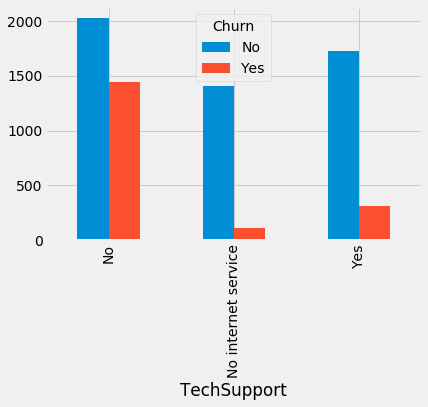

In [40]:
explore_relationship(data,'TechSupport','Churn')

p value is less than 0.05. We reject the null hypothesis at 5% significance level and conclude that, technical support and Churn are dependent. customers without technical support are likely to leave as compared to those with technical support.


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            2       372.457  1.32464e-81
Log-likelihood     2       447.271  7.52252e-98

Null Hypothesis: StreamingTV and Churn are independent
Altenate Hypothesis: StreamingTV and Churn are not independent
Relationship Between StreamingTV and Churn
Churn                  No  Yes
StreamingTV                   
No                   1867  942
No internet service  1407  113
Yes                  1889  814


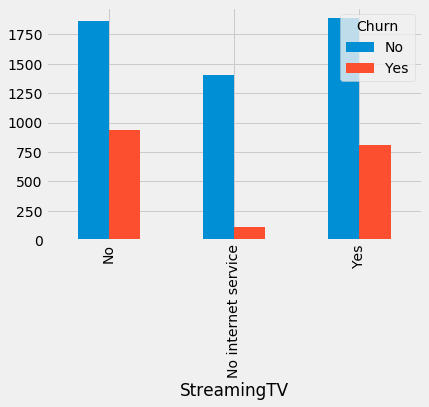

In [41]:
explore_relationship(data,'StreamingTV', 'Churn' )

We reject the null hyothesis at 5% level of significance and conclude that, streaming tv has a relationship with churning. Customers who doesnot use their internet services to stream online from third parties are likely to leave the company


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            2       374.268  5.35356e-82
Log-likelihood     2       448.9    3.33127e-98

Null Hypothesis: StreamingMovies and Churn are independent
Altenate Hypothesis: StreamingMovies and Churn are not independent
Relationship Between StreamingMovies and Churn
Churn                  No  Yes
StreamingMovies               
No                   1843  938
No internet service  1407  113
Yes                  1913  818


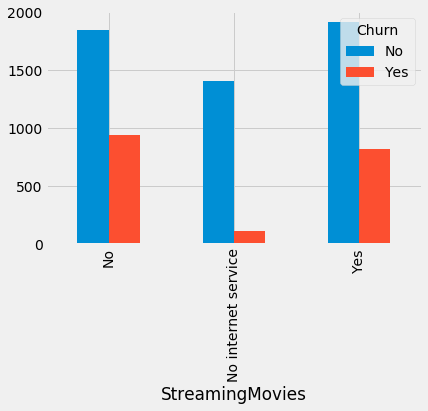

In [42]:
explore_relationship(data,'StreamingMovies', 'Churn' )

We reject the null hyothesis at 5% level of significance and conclude that, streaming tv has a relationship with churning. Customers who do not use their internet services to stream movies from third parties are likely to leave the company




Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       1179.55  7.32618e-257
Log-likelihood     2       1380.83  1.4309e-300

Null Hypothesis: Contract and Churn are independent
Altenate Hypothesis: Contract and Churn are not independent
Relationship Between Contract and Churn
Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1306   166
Two year        1637    48


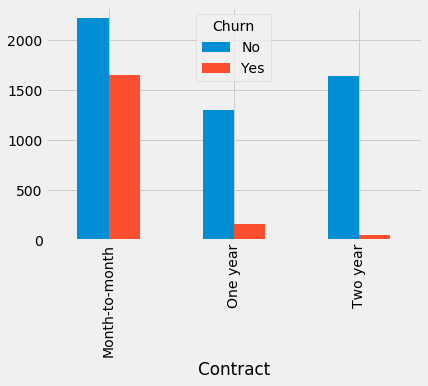

In [43]:
explore_relationship(data,'Contract', 'Churn' )

Customers whose contract type is a month-to-month contract is at a higher likelihood of churning as compared to those with annual contracts. 
The null hpothesis is rejected at 5% significance level. There is a relationship between contract and churn


Chi-squared test for independence

Test              Df    Chi-square     P-value
--------------  ----  ------------  ----------
Pearson            1       256.875  8.2362e-58
Log-likelihood     1       267.945  3.1821e-60

Null Hypothesis: PaperlessBilling and Churn are independent
Altenate Hypothesis: PaperlessBilling and Churn are not independent
Relationship Between PaperlessBilling and Churn
Churn               No   Yes
PaperlessBilling            
No                2395   469
Yes               2768  1400


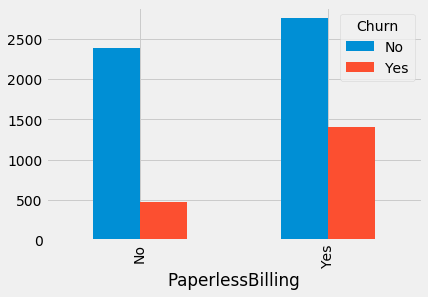

In [44]:
explore_relationship(data,'PaperlessBilling', 'Churn' )

The null hypothesis is rejected at 5% level of significance. people who uses paperless billing usually leaves the company as commpared to those without paperless billing


Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            3       645.43   1.42631e-139
Log-likelihood     3       624.764  4.3123e-135

Null Hypothesis: PaymentMethod and Churn are independent
Altenate Hypothesis: PaymentMethod and Churn are not independent
Relationship Between PaymentMethod and Churn
Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1284   258
Credit card (automatic)    1289   232
Electronic check           1294  1071
Mailed check               1296   308


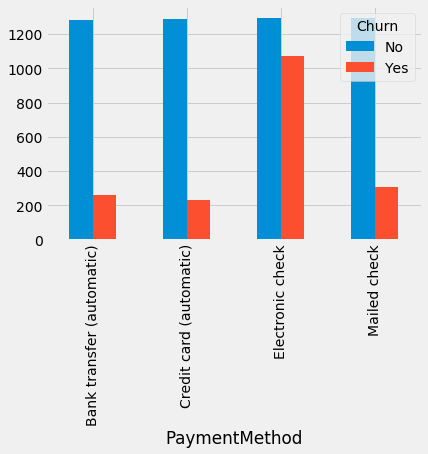

In [45]:
explore_relationship(data,'PaymentMethod', 'Churn')

Payemnt method has a relationship with the target variable (churn) since the p value is less than 0.05. customers that uses electronic check usually leaves the company.

### Exploring Numerical Variables

In [46]:
#extracting only numerical variables
numerical=data.select_dtypes(include=np.number)
for num in numerical:
    print(num)

SeniorCitizen
tenure
MonthlyCharges
TotalCharges


In [47]:
def explore_numeric(df, x):
    print('========================================================')
    print(df[x].describe())
    print(sns.distplot(df[x]).set_title(x))

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64
Text(0.5, 1.0, 'MonthlyCharges')


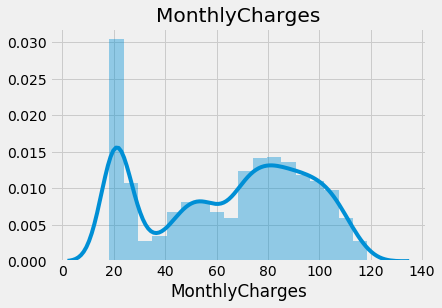

In [48]:
explore_numeric(data, 'MonthlyCharges');


From the graph, the minimum monthly charge is 18.25, maximum is 118.75 and the average monthly charge being 64.76. Most customers monthly charge is between 18 and 25. 

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
Text(0.5, 1.0, 'tenure')


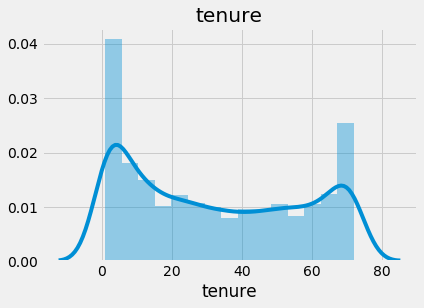

In [49]:
explore_numeric(data, 'tenure');

The minimum tenure is 0, maximum is 72 and the mean being 32. This means we have freshers and oldies on the organization. Most of the customers are freshers wheras a good number of them have are citizens of the company

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64
Text(0.5, 1.0, 'TotalCharges')


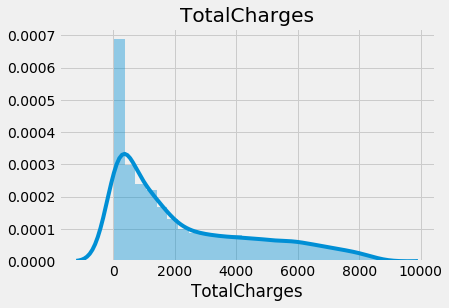

In [50]:
explore_numeric(data, 'TotalCharges');

#### Relationship between the numerical variables and the target variable

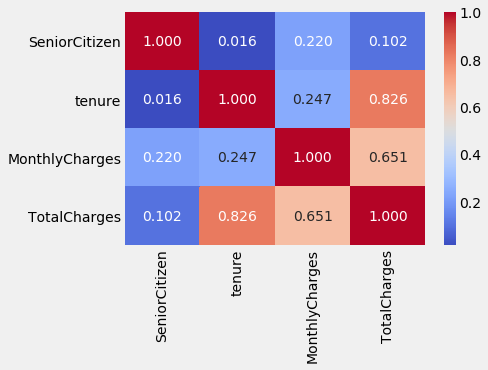

In [51]:
sns.heatmap(numerical.corr(), cmap='coolwarm', annot=True, fmt='.3f');

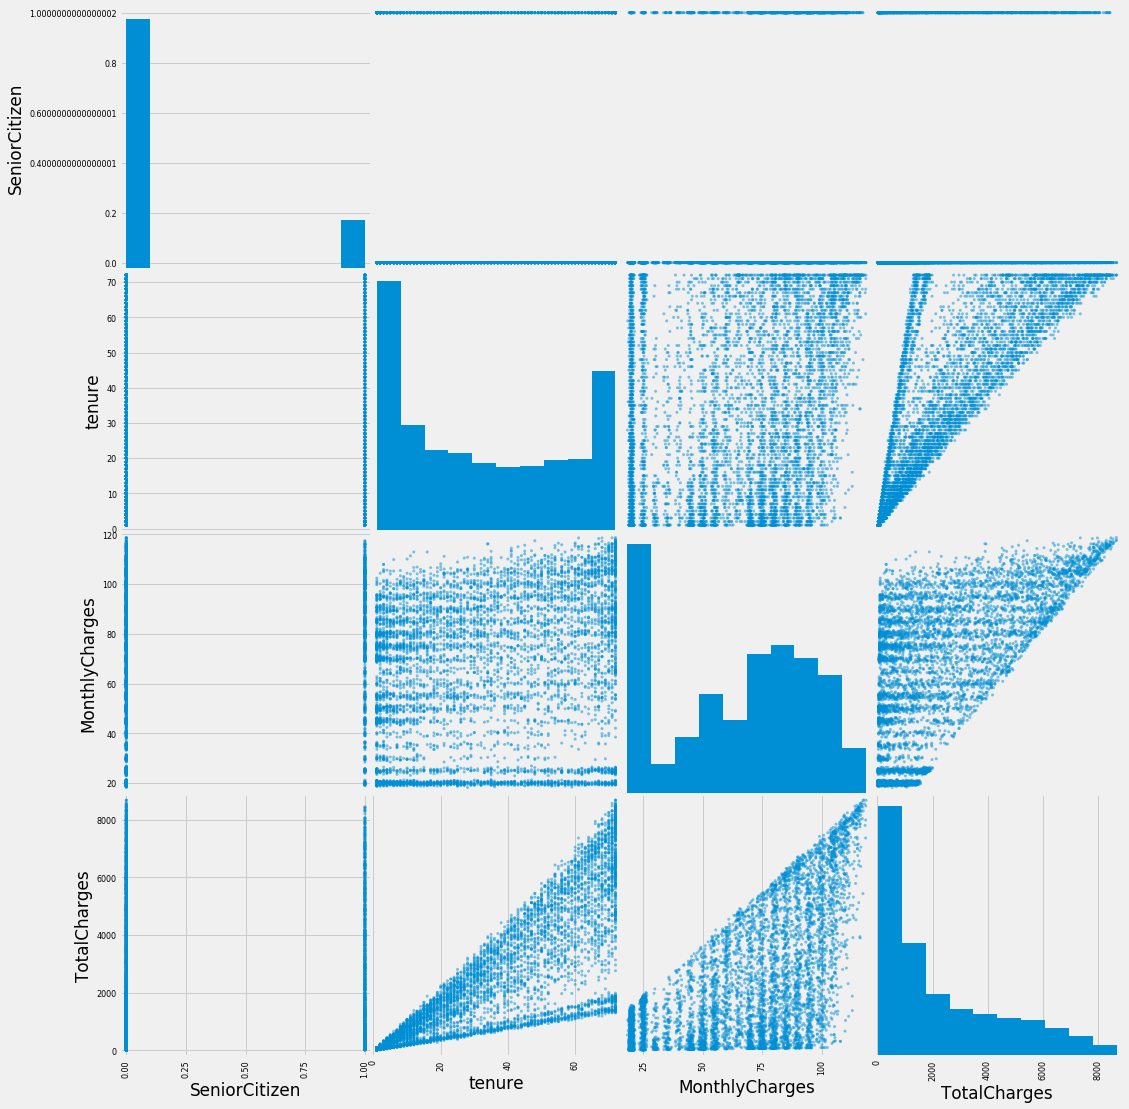

In [52]:
#plotting a scatterlot to measure the relationship between variables 
from pandas.plotting import scatter_matrix

pd.plotting.scatter_matrix(data, figsize=(16,18));

### Data Preprocessing
Here we try to process the data such as converting categorical variables to numerical, filling in missisng values so that the machine learning model will be able to process the data and make predictions

In [53]:
#converting categorical variables to numerical
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le=LabelEncoder()

In [54]:
data = pd.get_dummies(data, columns= ['SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], drop_first = True)

we will use one hot encoder since it does not rank the categories. The label encoder ranks the variables in such a way that one is better than the other. If we have only two categories, we can proceed with the label encoding


In [55]:
#dropping the gender column since it has no relationship with the target variable
data.drop(columns=['gender'], inplace=True)

In [56]:
#splitting data  into dependent and independent variables
X = data.drop(['Churn'], axis=1)  ##independent 
y1=data['Churn']  #dependent variable
y = le.fit_transform(y1) #converting the target variable to 0 and 1s

### Predictive Modelling

In [57]:
#importing required models 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix 
from sklearn.svm import SVC
#from sklearn.xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score 


In [58]:
#splitting data into test and train 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

**Here I will try apply hyperparameter tuning on the algorithms and figure out the best parameters to feed the model. Another approach too is to build the baseline model with the default parameters, get the best algorithm and apply the hyperarameter tunning to get the best parameters** 

### Logistic Regression 

In [59]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=42)
param_grid={'C':[0.01, 0.05, 0.5,1, 5,10,50,100]}
lr_grid=GridSearchCV(lr, param_grid=param_grid,cv=5)
lr_grid.fit(X_train, y_train)
print('Logistic Regression CV score is {}'.format(lr_grid.best_score_))
print('Logistic Regression best parameters is {}'.format(lr_grid.best_params_))

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Logistic Regression CV score is 0.8041477858941025
Logistic Regression best parameters is {'C': 50}


In [60]:
#fitting the logistic regression again with the hyperparametized values
lr=LogisticRegression(C=1, random_state=42)
lr.fit(X_train, y_train)
lr_pred=lr.predict(X_test)
#lets use the test and train score to test if our model is fitting well
print('Train score is {:.3f}'.format(lr.score(X_train, y_train)))
print('Test score is {:.3f}'.format(lr.score(X_test, y_test)))
print('F1 score for logistic regression is {:.3f}'.format(f1_score(lr_pred, y_test)))
print('ROC score for logistic regression is {:.3f}'.format(roc_auc_score(lr_pred, y_test)))
lr_train=lr.score(X_train, y_train)
lr_test=lr.score(X_test, y_test)
lr_roc=roc_auc_score(lr_pred, y_test)
lr_f1=f1_score(lr_pred, y_test)

Train score is 0.806
Test score is 0.786
F1 score for logistic regression is 0.555
ROC score for logistic regression is 0.726


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


I decided to perform hyperparameter tuning to the model and get the best parameters to fit in the model. I can equally build the base model, look at the performance and then apply hyperparameter to optimize the model

In [61]:
#classification report 
print(classification_report(lr_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1658
           1       0.50      0.62      0.55       452

    accuracy                           0.79      2110
   macro avg       0.70      0.73      0.71      2110
weighted avg       0.81      0.79      0.79      2110



In [62]:
confusion_matrix(lr_pred, y_test)

array([[1378,  280],
       [ 171,  281]], dtype=int64)

**Since our data is not balanced, we therefore cannot use the accuracy score as our evluation metrics. we either use f1 score or ROC score. I used the accuracy score for the test and train just to check for overfitting/underfitting.** 


### SVM

In [63]:
#using the pipeline to build the support vector machine 
svc = SVC()
#pipe=make_pipeline([('Scaler', MinMaxScaler()), ('KNN', KNeighborsClassifier())])
pipe = Pipeline([('Scaler', MinMaxScaler()),('svm', svc)])

param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100, 200],'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
sv_grid=GridSearchCV(pipe, param_grid=param_grid, cv=5)
sv_grid.fit(X_train, y_train)
print('SVM best CV score is {}'.format(sv_grid.best_score_))
print('SVM best parameters are {}'.format(sv_grid.best_params_))
#NB; I am using the pipeline for this with the scaling because i dont want the data to be scaled for all the data
# to prevent information leakage. I therefore fit the scaler in the pipeline 

SVM best CV score is 0.8010969419338864
SVM best parameters are {'svm__C': 1, 'svm__gamma': 0.1}


In [64]:
#fitting the svm with the hyperparameters
sv=Pipeline([('Scaler', MinMaxScaler()), ('SVC', SVC(C=200, gamma=0.1))])
sv.fit(X_train, y_train)
print('Train accuracy: {:.3f}'.format(sv.score(X_train,y_train)))
print('Test accuracy: {:.3f}'.format(sv.score(X_test,y_test)))


Train accuracy: 0.974
Test accuracy: 0.729


In [65]:
sv_pred=sv.predict(X_test)
print('ROC score for SVM is {:.3f}%'.format(roc_auc_score(sv_pred, y_test)*100))
print('F1 score for SVM is {:.3f}'.format(f1_score(sv_pred, y_test)*100))


ROC score for SVM is 65.617%
F1 score for SVM is 50.218


In [66]:
sv_train=sv.score(X_train, y_train)
sv_test=sv.score(X_test, y_test)
sv_roc=roc_auc_score(sv_pred, y_test)
sv_f1=f1_score(sv_pred, y_test)

# KNN


In [67]:
#base mode for knn
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred=knn.predict(X_test)
print('Train SCore {:.3f}'.format(knn.score(X_train, y_train)))
print('Test SCore {:.3f}'.format(knn.score(X_test, y_test)))

Train SCore 0.829
Test SCore 0.772


In [68]:
k_range = list(range(1,31))
parameters = {'n_neighbors':k_range,
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'weights': ["uniform", "distance"],}

#Fit the model
gs_knn = GridSearchCV(knn, param_grid=parameters,n_jobs=-1,verbose=2)
gs_knn.fit(X_train,y_train)

# predict
best_knn=gs_knn.best_estimator_

scores = gs_knn.score(X_test,y_test)
print("test score:",scores)
print("best parameters: ",gs_knn.best_params_)
print("best train score: ", gs_knn.best_score_)


Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  1.1min finished


test score: 0.7805687203791469
best parameters:  {'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 17, 'weights': 'uniform'}
best train score:  0.7830194791795634


In [69]:
#fitting the logistic regression with the hyperparamitized values
knn=KNeighborsClassifier(algorithm='auto', leaf_size=5, n_neighbors=17, weights='uniform')
knn.fit(X_train, y_train)
knn_pred=knn.predict(X_test)
print(roc_auc_score(knn_pred, y_test))

0.7244885644578392


In [70]:
knn_train=knn.score(X_train, y_train)
knn_test=knn.score(X_test, y_test)
knn_roc=roc_auc_score(knn_pred, y_test)
knn_f1=f1_score(knn_pred, y_test)

### Decision Tree With Grid Search and Cross Validation

In [71]:

#instatiating the model
dt=DecisionTreeClassifier()
param_grid={'max_features':np.arange(1,10), 'max_leaf_nodes':[1,2,3, 4,5]}
dt_grid=GridSearchCV(dt, param_grid=param_grid, cv=5)
dt_grid.fit(X_train, y_train)
print('Decision tree CV score is {}'.format(dt_grid.best_score_))
print('Best parameters are {}'.format(dt_grid.best_params_))

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: F

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: F

Decision tree CV score is 0.7606745491312782
Best parameters are {'max_features': 9, 'max_leaf_nodes': 4}


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: F

In [72]:
#now fitting the decision tree model with the correct parameters
dt=DecisionTreeClassifier(max_features=8, max_leaf_nodes=4, random_state=42)
dt.fit(X_train, y_train)
dt_pred=dt.predict(X_test)
print('The F1 score is {}'.format(f1_score(dt_pred, y_test)))
print('ROC score for decision tree is {}'.format(roc_auc_score(dt_pred, y_test)))

The F1 score is 0.5376162299239222
ROC score for decision tree is 0.6739737838398506


In [73]:
#confusion matrix
confusion_matrix(dt_pred, y_test)

array([[1245,  243],
       [ 304,  318]], dtype=int64)

In [74]:
#lets use the test and train score to test if our model is fitting well
print('Train score is {}'.format(dt.score(X_train, y_train)))
print('Test score is {}'.format(dt.score(X_test, y_test)))

Train score is 0.7442096708655018
Test score is 0.7407582938388626


In [75]:
dt_train=dt.score(X_train, y_train)
dt_test=dt.score(X_test, y_test)
dt_roc=roc_auc_score(dt_pred, y_test)
dt_f1=f1_score(dt_pred, y_test)

Decision tree is the basis for the ensemble models. we hyperparametrically tuned it to give us the best parameters. ROC gave us 87%. Overfitting/Underfitting too is quite not worrying here. 

### Random Forest

In [76]:
rf=RandomForestClassifier(random_state=42)
param_grid={'max_depth':np.arange(10), 'max_features':np.arange(8)}
rf_grid=GridSearchCV(rf, param_grid, cv=5)
rf_grid.fit(X_train, y_train)
print('The random forest CV score is {}'.format(rf_grid.best_score_))
print('The random forest best parameters score is {}'.format(rf_grid.best_params_))

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The

The random forest CV score is 0.7972372167884115
The random forest best parameters score is {'max_depth': 9, 'max_features': 7}


In [77]:
#fitting the random forest 
rf=RandomForestClassifier(random_state=42, max_features=7, max_depth=9)
rf.fit(X_train, y_train)
rf_pred=rf.predict(X_test)
print('F1 score for Randome Forest is {:.3f}'.format(f1_score(rf_pred, y_test)))
print('ROC score for Random Foresr is {:.3f}'.format(roc_auc_score(rf_pred, y_test)))

F1 score for Randome Forest is 0.479
ROC score for Random Foresr is 0.738


In [78]:
#lets use the test and train score to test if our model is fitting well
print('Train score is {}'.format(rf.score(X_train, y_train)))
print('Test score is {}'.format(rf.score(X_test, y_test)))

Train score is 0.8275091426249492
Test score is 0.7848341232227488


In [79]:
rf_train=rf.score(X_train, y_train)
rf_test=rf.score(X_test, y_test)
rf_roc=roc_auc_score(rf_pred, y_test)
rf_f1=f1_score(rf_pred, y_test)

since random forest is an esemble leaning (that is combines weaker models and use that to create a stronger one), I used the parameters from the decision tree which gave me the best parameters for the model. I got and ROC value of 83%. Quite cool right. Overfitting here (train score>test scoe). But Note that we aint using the accuracy score as our evaluating metrics since our data is not balanced. 

# AdaBoost Classifier 

In [80]:
dt=DecisionTreeClassifier(max_features=8, max_leaf_nodes=4, random_state=42)
adb = AdaBoostClassifier(base_estimator=dt,n_estimators=150,random_state=0)
adb.fit(X_train, y_train)
print('Train score is {}'.format(adb.score(X_train, y_train)))
print('Test score is {}'.format(adb.score(X_test, y_test)))

Train score is 0.8315725314912638
Test score is 0.7582938388625592


In [81]:
adb_pred=adb.predict(X_test)
print('The F1 score is {}'.format(f1_score(adb_pred, y_test)))
print('ROC score for Adaboost is {}'.format(roc_auc_score(adb_pred, y_test)))

The F1 score is 0.5462633451957296
ROC score for Adaboost is 0.6905521602000548


In [82]:
adb_train=adb.score(X_train, y_train)
adb_test=adb.score(X_test, y_test)
adb_roc=roc_auc_score(adb_pred, y_test)
adb_f1=f1_score(adb_pred, y_test)

# Gradient Boosting

In [83]:
gb=GradientBoostingClassifier()
param_grid={'n_estimators':[50,100,200,300], 'max_depth':np.arange(5)}
gb_grid=GridSearchCV(gb, param_grid=param_grid, cv=5)
gb_grid.fit(X_train, y_train)
print('The Gradient Boosting CV score is {}'.format(gb_grid.best_score_))
print('The Gradient Boosting best parameters score is {}'.format(gb_grid.best_params_))


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

The Gradient Boosting CV score is 0.8047569229499402
The Gradient Boosting best parameters score is {'max_depth': 2, 'n_estimators': 300}


In [84]:
#using the hyperparameters to instatiate our model
gb=GradientBoostingClassifier(max_depth = 2, n_estimators=300)
gb.fit(X_train, y_train)
print('Train score is {}'.format(gb.score(X_train, y_train)))
print('Test score is {}'.format(gb.score(X_test, y_test)))

Train score is 0.8340105648110524
Test score is 0.7971563981042654


In [85]:
gb_pred=gb.predict(X_test)
print('The F1 score is {}'.format(f1_score(gb_pred, y_test)))
print('ROC score for Adaboost is {}'.format(roc_auc_score(gb_pred, y_test)))

The F1 score is 0.5728542914171656
ROC score for Adaboost is 0.7433117445100668


In [86]:
gb_train=gb.score(X_train, y_train)
gb_test=gb.score(X_test, y_test)
gb_roc=roc_auc_score(gb_pred, y_test)
gb_f1=f1_score(gb_pred, y_test)

### XGB

In [87]:
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train, y_train)
print('Train score is {}'.format(xgb.score(X_train, y_train)))
print('Test score is {}'.format(xgb.score(X_test, y_test)))

C:\Users\Owner\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:40:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score is 0.9240146281999188
Test score is 0.7777251184834123


In [88]:
param_grid={'n_estimators':[50,100,200,300], 'max_depth':np.arange(9), 'n_estimators': [50,100,115,130,150]}


In [89]:
xgb_grid=GridSearchCV(xgb, param_grid, cv=5)
xgb_grid.fit(X_train, y_train)
print('The XGBoost CV score is {}'.format(xgb_grid.best_score_))
print('The XGBoost best parameters score is {}'.format(xgb_grid.best_params_))


[20:40:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Owner\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:40:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:40:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:40:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:40:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:40:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:40:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:41:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:41:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:41:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:41:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:41:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:41:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:41:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:41:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:41:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:41:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:41:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:41:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [90]:
xgb=GradientBoostingClassifier(n_estimators=100, max_depth=2)
xgb.fit(X_train, y_train)
print('Train score is {}'.format(xgb.score(X_train, y_train)))
print('Test score is {}'.format(xgb.score(X_test, y_test)))

Train score is 0.8193823648923202
Test score is 0.7966824644549763


In [91]:
xgb_pred=gb.predict(X_test)
print('The F1 score is {}'.format(f1_score(xgb_pred, y_test)))
print('ROC score for Adaboost is {}'.format(roc_auc_score(xgb_pred, y_test)))

The F1 score is 0.5728542914171656
ROC score for Adaboost is 0.7433117445100668


In [92]:
xgb_train=xgb.score(X_train, y_train)
xgb_test=xgb.score(X_test, y_test)
xgb_roc=roc_auc_score(xgb_pred, y_test)
xgb_f1=f1_score(xgb_pred, y_test)

### Model Evaluation Scores

In [93]:
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix 

In [94]:
models = ["Logistic Regression", "SVC", "Random Forest", "Decision Tree", 'Gradient Boosting', 'AdaBoost', 'KNN', 'XGB']
train=[lr_train, sv_train, rf_train, dt_train, gb_train, adb_train, knn_train, xgb_train]
test=[lr_test, sv_test, rf_test, dt_test, gb_test, adb_test, knn_test, xgb_test]
f1=[lr_f1, sv_f1, rf_f1, dt_f1, gb_f1, adb_f1, knn_f1, xgb_f1]
roc=[lr_roc, sv_roc, rf_roc, dt_roc, gb_roc, adb_roc, knn_roc, xgb_roc]

In [95]:
metrics = {"Model" : models, "Train Score": train, "Test Score" : test, "F1 Score": f1, 'ROC Score':roc}
my_models = pd.DataFrame(metrics)
my_models

,Model,Train Score,Test Score,F1 Score,ROC Score
0,Logistic Regression,0.806176,0.786256,0.554788,0.726402
1,SVC,0.974401,0.729384,0.502180,0.656167
2,Random Forest,0.827509,0.784834,0.479358,0.738181
3,Decision Tree,0.744210,0.740758,0.537616,0.673974
4,Gradient Boosting,0.834011,0.797156,0.572854,0.743312
5,AdaBoost,0.831573,0.758294,0.546263,0.690552
6,KNN,0.799878,0.780569,0.490649,0.724489
7,XGB,0.819382,0.796682,0.572854,0.743312


In [98]:
my_models.sort_values(by = "ROC Score", ascending= False, ignore_index = True)

,Model,Train Score,Test Score,F1 Score,ROC Score
0,Gradient Boosting,0.834011,0.797156,0.572854,0.743312
1,XGB,0.819382,0.796682,0.572854,0.743312
2,Random Forest,0.827509,0.784834,0.479358,0.738181
3,Logistic Regression,0.806176,0.786256,0.554788,0.726402
4,KNN,0.799878,0.780569,0.490649,0.724489
5,AdaBoost,0.831573,0.758294,0.546263,0.690552
6,Decision Tree,0.744210,0.740758,0.537616,0.673974
7,SVC,0.974401,0.729384,0.502180,0.656167


NameError: name 'thresholds' is not defined

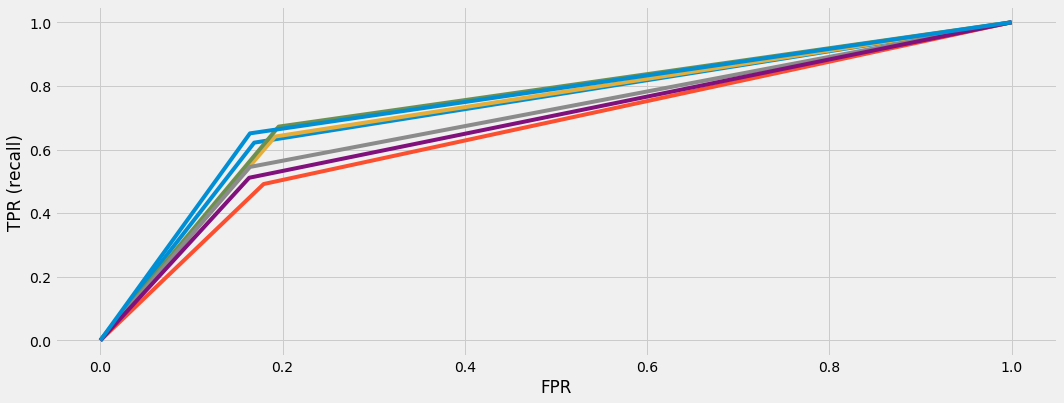

In [97]:
#plotting a grapgh to see how the algorithms are faring the the ROC 
from sklearn.metrics import roc_curve
fpr_lr, tpr_lr, thresholds_sv=roc_curve(lr_pred, y_test)
fpr_sv, tpr_sv, thresholds_sv=roc_curve(sv_pred, y_test)
fpr_knn, tpr_knn, thresholds_knn=roc_curve(knn_pred, y_test)
fpr_rf, tpr_rf, thresholds_rf=roc_curve(rf_pred, y_test)
fpr_adb, tpr_adb, thresholds_adb=roc_curve(adb_pred, y_test)
fpr_dt, tpr_dt, thresholds_dt=roc_curve(dt_pred, y_test)
fpr_gb, tpr_gb, thresholds_gb=roc_curve(gb_pred, y_test)

#plotting the graphs 
plt.figure(figsize=(16,6))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_sv, tpr_sv, label="SVC")
plt.plot(fpr_knn, tpr_knn, label="KNN")
plt.plot(fpr_rf, tpr_rf, label="Random Forest") 
plt.plot(fpr_adb, tpr_adb, label="AdaBoost") 
plt.plot(fpr_dt, tpr_dt, label="Decision Tree") 
plt.plot(fpr_gb, tpr_gb, label="Gradient Boosting") 

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=5,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.show()

From the results of the six models,Gradient Boosting gave the best results for ROC. we using ROC because our data is not balanced and ROC is the measure of the ability to distinguish between classes. we can equally use the f1 score which is the harmonic mean of the precision and recall. 

In [ ]:
#hyperparameter tuning on xgboost
!pip install catboost

In [99]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier()
cat.fit(X_train, y_train)
print('Train score is {}'.format(cat.score(X_train, y_train)))
print('Test score is {}'.format(cat.score(X_test, y_test)))

Learning rate set to 0.020346
0:	learn: 0.6816116	total: 165ms	remaining: 2m 44s
1:	learn: 0.6667225	total: 170ms	remaining: 1m 24s
2:	learn: 0.6528127	total: 174ms	remaining: 57.7s
3:	learn: 0.6399706	total: 177ms	remaining: 44.1s
4:	learn: 0.6288821	total: 196ms	remaining: 39s
5:	learn: 0.6180723	total: 200ms	remaining: 33.1s
6:	learn: 0.6071341	total: 203ms	remaining: 28.8s
7:	learn: 0.5991768	total: 206ms	remaining: 25.5s
8:	learn: 0.5900687	total: 209ms	remaining: 23s
9:	learn: 0.5802165	total: 212ms	remaining: 21s
10:	learn: 0.5724501	total: 215ms	remaining: 19.3s
11:	learn: 0.5640355	total: 218ms	remaining: 18s
12:	learn: 0.5568505	total: 221ms	remaining: 16.8s
13:	learn: 0.5503062	total: 224ms	remaining: 15.8s
14:	learn: 0.5450440	total: 227ms	remaining: 14.9s
15:	learn: 0.5383685	total: 230ms	remaining: 14.2s
16:	learn: 0.5321294	total: 233ms	remaining: 13.5s
17:	learn: 0.5271059	total: 236ms	remaining: 12.9s
18:	learn: 0.5221768	total: 239ms	remaining: 12.4s
19:	learn: 0.5177

163:	learn: 0.3889509	total: 708ms	remaining: 3.61s
164:	learn: 0.3887933	total: 711ms	remaining: 3.6s
165:	learn: 0.3886507	total: 714ms	remaining: 3.59s
166:	learn: 0.3884912	total: 717ms	remaining: 3.58s
167:	learn: 0.3883430	total: 720ms	remaining: 3.56s
168:	learn: 0.3881580	total: 723ms	remaining: 3.56s
169:	learn: 0.3878418	total: 727ms	remaining: 3.55s
170:	learn: 0.3877288	total: 733ms	remaining: 3.56s
171:	learn: 0.3873975	total: 761ms	remaining: 3.66s
172:	learn: 0.3872581	total: 765ms	remaining: 3.66s
173:	learn: 0.3870179	total: 770ms	remaining: 3.65s
174:	learn: 0.3868162	total: 773ms	remaining: 3.65s
175:	learn: 0.3867732	total: 776ms	remaining: 3.63s
176:	learn: 0.3866263	total: 803ms	remaining: 3.73s
177:	learn: 0.3864493	total: 810ms	remaining: 3.74s
178:	learn: 0.3862795	total: 823ms	remaining: 3.77s
179:	learn: 0.3860084	total: 827ms	remaining: 3.77s
180:	learn: 0.3858542	total: 831ms	remaining: 3.76s
181:	learn: 0.3857178	total: 835ms	remaining: 3.75s
182:	learn: 0

365:	learn: 0.3616388	total: 1.4s	remaining: 2.42s
366:	learn: 0.3615377	total: 1.4s	remaining: 2.41s
367:	learn: 0.3614089	total: 1.4s	remaining: 2.41s
368:	learn: 0.3613311	total: 1.41s	remaining: 2.4s
369:	learn: 0.3611859	total: 1.41s	remaining: 2.4s
370:	learn: 0.3610157	total: 1.41s	remaining: 2.39s
371:	learn: 0.3608960	total: 1.43s	remaining: 2.42s
372:	learn: 0.3607729	total: 1.43s	remaining: 2.41s
373:	learn: 0.3606599	total: 1.44s	remaining: 2.4s
374:	learn: 0.3605364	total: 1.44s	remaining: 2.4s
375:	learn: 0.3603724	total: 1.44s	remaining: 2.39s
376:	learn: 0.3601988	total: 1.45s	remaining: 2.39s
377:	learn: 0.3600572	total: 1.45s	remaining: 2.38s
378:	learn: 0.3599380	total: 1.45s	remaining: 2.38s
379:	learn: 0.3598262	total: 1.45s	remaining: 2.37s
380:	learn: 0.3597695	total: 1.46s	remaining: 2.37s
381:	learn: 0.3596482	total: 1.46s	remaining: 2.36s
382:	learn: 0.3595571	total: 1.46s	remaining: 2.35s
383:	learn: 0.3595021	total: 1.46s	remaining: 2.35s
384:	learn: 0.35940

526:	learn: 0.3428680	total: 1.92s	remaining: 1.72s
527:	learn: 0.3427058	total: 1.92s	remaining: 1.72s
528:	learn: 0.3426018	total: 1.92s	remaining: 1.71s
529:	learn: 0.3424729	total: 1.93s	remaining: 1.71s
530:	learn: 0.3422992	total: 1.93s	remaining: 1.7s
531:	learn: 0.3422090	total: 1.93s	remaining: 1.7s
532:	learn: 0.3420711	total: 1.94s	remaining: 1.7s
533:	learn: 0.3419401	total: 1.94s	remaining: 1.69s
534:	learn: 0.3418385	total: 1.94s	remaining: 1.69s
535:	learn: 0.3417373	total: 1.95s	remaining: 1.69s
536:	learn: 0.3416737	total: 1.95s	remaining: 1.68s
537:	learn: 0.3416011	total: 1.98s	remaining: 1.7s
538:	learn: 0.3414764	total: 1.99s	remaining: 1.7s
539:	learn: 0.3413502	total: 2s	remaining: 1.7s
540:	learn: 0.3412411	total: 2s	remaining: 1.7s
541:	learn: 0.3411088	total: 2s	remaining: 1.69s
542:	learn: 0.3409837	total: 2.01s	remaining: 1.69s
543:	learn: 0.3408262	total: 2.02s	remaining: 1.7s
544:	learn: 0.3407359	total: 2.04s	remaining: 1.7s
545:	learn: 0.3406056	total: 2

692:	learn: 0.3249919	total: 2.64s	remaining: 1.17s
693:	learn: 0.3248853	total: 2.65s	remaining: 1.17s
694:	learn: 0.3247825	total: 2.65s	remaining: 1.16s
695:	learn: 0.3246936	total: 2.65s	remaining: 1.16s
696:	learn: 0.3246520	total: 2.66s	remaining: 1.15s
697:	learn: 0.3245911	total: 2.66s	remaining: 1.15s
698:	learn: 0.3245513	total: 2.66s	remaining: 1.15s
699:	learn: 0.3244513	total: 2.68s	remaining: 1.15s
700:	learn: 0.3243420	total: 2.69s	remaining: 1.15s
701:	learn: 0.3241866	total: 2.69s	remaining: 1.14s
702:	learn: 0.3241147	total: 2.69s	remaining: 1.14s
703:	learn: 0.3239680	total: 2.7s	remaining: 1.13s
704:	learn: 0.3238686	total: 2.7s	remaining: 1.13s
705:	learn: 0.3237489	total: 2.7s	remaining: 1.13s
706:	learn: 0.3236890	total: 2.71s	remaining: 1.12s
707:	learn: 0.3236504	total: 2.71s	remaining: 1.12s
708:	learn: 0.3236220	total: 2.71s	remaining: 1.11s
709:	learn: 0.3235296	total: 2.71s	remaining: 1.11s
710:	learn: 0.3234002	total: 2.73s	remaining: 1.11s
711:	learn: 0.3

860:	learn: 0.3092636	total: 3.35s	remaining: 540ms
861:	learn: 0.3091630	total: 3.35s	remaining: 536ms
862:	learn: 0.3090574	total: 3.35s	remaining: 532ms
863:	learn: 0.3089939	total: 3.35s	remaining: 528ms
864:	learn: 0.3088926	total: 3.36s	remaining: 524ms
865:	learn: 0.3088197	total: 3.36s	remaining: 520ms
866:	learn: 0.3086947	total: 3.36s	remaining: 516ms
867:	learn: 0.3085935	total: 3.37s	remaining: 512ms
868:	learn: 0.3084960	total: 3.37s	remaining: 508ms
869:	learn: 0.3083981	total: 3.38s	remaining: 506ms
870:	learn: 0.3082796	total: 3.39s	remaining: 502ms
871:	learn: 0.3082040	total: 3.39s	remaining: 497ms
872:	learn: 0.3081233	total: 3.39s	remaining: 493ms
873:	learn: 0.3080236	total: 3.39s	remaining: 489ms
874:	learn: 0.3079327	total: 3.4s	remaining: 485ms
875:	learn: 0.3078349	total: 3.4s	remaining: 481ms
876:	learn: 0.3077362	total: 3.4s	remaining: 477ms
877:	learn: 0.3076298	total: 3.4s	remaining: 473ms
878:	learn: 0.3074802	total: 3.41s	remaining: 469ms
879:	learn: 0.30

In [100]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()
lgbm.fit(X_train, y_train)
print('Train score is {}'.format(lgbm.score(X_train, y_train)))
print('Test score is {}'.format(lgbm.score(X_test, y_test)))

Train score is 0.8852092645266152
Test score is 0.7843601895734598
